<a href="https://colab.research.google.com/github/yuvarajrajdata/task_2_3/blob/main/TASK_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
import pandas as pd
df = pd.read_csv("/content/tested.csv")
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [39]:
df.shape

(418, 12)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [41]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
# to find duplicates :
df.duplicated().sum()

0

In [43]:
df = df.drop(['PassengerId'], axis=1)

In [44]:
df = df.drop(['Cabin'], axis=1)

In [45]:
df = df.drop(['Ticket'], axis=1)

In [46]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q
3,0,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S
4,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,0,3,"Spector, Mr. Woolf",male,NaN,0,0,8.0500,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,0,3,"Ware, Mr. Frederick",male,NaN,0,0,8.0500,S


In [47]:
df['Age'].mode()

0    21.0
1    24.0
Name: Age, dtype: float64

In [48]:
df["Age"] = df["Age"].fillna(df["Age"].mode()[0])

In [49]:
df.tail(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
413,0,3,"Spector, Mr. Woolf",male,21.0,0,0,8.0500,S
414,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,108.9000,C
415,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,7.2500,S
416,0,3,"Ware, Mr. Frederick",male,21.0,0,0,8.0500,S
417,0,3,"Peter, Master. Michael J",male,21.0,1,1,22.3583,C


In [50]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,0.363636,2.265550,28.364833,0.447368,0.392344,35.627188
std,0.481622,0.841838,13.180116,0.896760,0.981429,55.907576
min,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [51]:

# outlier treatments for 'age' :
iqr =df['Survived'].quantile(0.75) - df['Survived'].quantile(0.25)
print('iqr :',iqr)

upper_limit = df['Survived'].quantile(0.75) + 1.5*iqr
print('upper_limit :',upper_limit)

lower_limit = df['Survived'].quantile(0.25) - 1.5*iqr
print('lower_limit :',lower_limit)

# clip the outliers uisng pandas:
df['Survived'] = df['Survived'].clip(lower_limit,upper_limit)


iqr : 1.0
upper_limit : 2.5
lower_limit : -1.5


In [52]:
# outlier treatments for 'age' :
iqr =df['Pclass'].quantile(0.75) - df['Pclass'].quantile(0.25)
print('iqr :',iqr)

upper_limit = df['Pclass'].quantile(0.75) + 1.5*iqr
print('upper_limit :',upper_limit)

lower_limit = df['Pclass'].quantile(0.25) - 1.5*iqr
print('lower_limit :',lower_limit)

# clip the outliers uisng pandas:
df['Pclass'] = df['Pclass'].clip(lower_limit,upper_limit)


iqr : 2.0
upper_limit : 6.0
lower_limit : -2.0


In [53]:
# outlier treatments for 'age' :
iqr =df['Age'].quantile(0.75) - df['Age'].quantile(0.25)
print('iqr :',iqr)

upper_limit = df['Age'].quantile(0.75) + 1.5*iqr
print('upper_limit :',upper_limit)

lower_limit = df['Pclass'].quantile(0.25) - 1.5*iqr
print('lower_limit :',lower_limit)

# clip the outliers uisng pandas:
df['Age'] = df['Age'].clip(lower_limit,upper_limit)


iqr : 14.75
upper_limit : 57.875
lower_limit : -21.125


In [54]:
df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Kelly, Mr. James",male,34.500,0,0,7.8292,Q
1,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.000,1,0,7.0000,S
2,0,2,"Myles, Mr. Thomas Francis",male,57.875,0,0,9.6875,Q


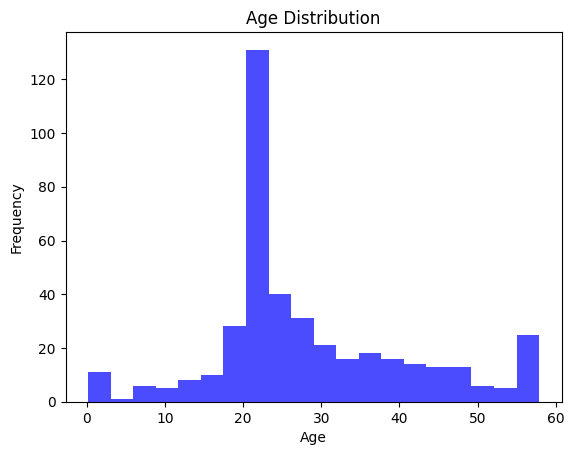

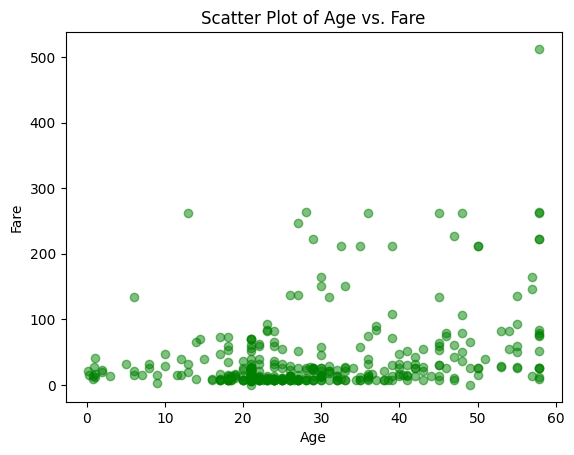

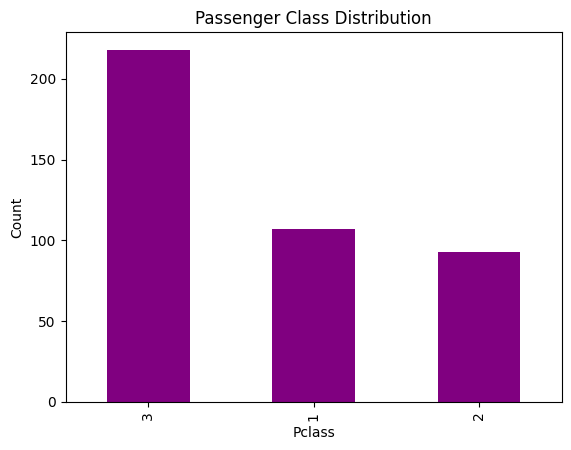

In [55]:
import matplotlib.pyplot as plt

#  Plot a histogram of the 'Age' column
plt.hist(df['Age'], bins=20, color='blue', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Example: Create a scatter plot of 'Age' vs. 'Fare'
plt.scatter(df['Age'], df['Fare'], color='green', alpha=0.5)
plt.title('Scatter Plot of Age vs. Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

#Create a bar chart for categorical data 'Pclass'
df['Pclass'].value_counts().plot(kind='bar', color='purple')
plt.title('Passenger Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()


In [56]:
# Assuming 'df' is your DataFrame
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'])


In [57]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Pclass'] = label_encoder.fit_transform(df['Pclass'])


In [58]:
df = df.drop(['Name'], axis=1)

In [59]:
df.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,2,34.500,0,0,7.8292,0,1,0,1,0
1,1,2,47.000,1,0,7.0000,1,0,0,0,1
2,0,1,57.875,0,0,9.6875,0,1,0,1,0


In [60]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_female      uint8
Sex_male        uint8
Embarked_C      uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [61]:
df

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,2,34.500,0,0,7.8292,0,1,0,1,0
1,1,2,47.000,1,0,7.0000,1,0,0,0,1
2,0,1,57.875,0,0,9.6875,0,1,0,1,0
3,0,2,27.000,0,0,8.6625,0,1,0,0,1
4,1,2,22.000,1,1,12.2875,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
413,0,2,21.000,0,0,8.0500,0,1,0,0,1
414,1,0,39.000,0,0,108.9000,1,0,1,0,0
415,0,2,38.500,0,0,7.2500,0,1,0,0,1
416,0,2,21.000,0,0,8.0500,0,1,0,0,1


In [62]:
df.dropna(subset=['Fare'], inplace=True)

df.reset_index(drop=True, inplace=True)

In [63]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [64]:
import pandas as pd
from sklearn.cluster import KMeans
import re

# Load the dataset from a CSV file
data = df

# Perform K-means clustering to identify columns
kmeans = KMeans(n_clusters=10, n_init=10)  # Set n_init explicitly to suppress the warning
kmeans.fit(data)

# Get the cluster centers and assign labels to columns
data['column_label'] = kmeans.labels_

# Define keywords for the columns you want to identify
keywords = ["Name", "Address", "Age", "Date of Birth", "Gender", "Sexual Orientation", "Religion", "Health", "Race", "Ethnic"]

# Initialize a dictionary to store the identified columns
identified_columns = {}

# Iterate through the clusters to find the matching columns
for label in range(10):
    cluster_data = data[data['column_label'] == label]
    cluster_text = ' '.join(cluster_data.iloc[0].astype(str))

    # Find the keyword that matches with the cluster text
    matched_keyword = None
    for keyword in keywords:
        if re.search(keyword, cluster_text, re.IGNORECASE):
            matched_keyword = keyword
            break

    if matched_keyword:
        identified_columns[matched_keyword] = cluster_data.columns.tolist()

# Print the identified columns
for keyword, columns in identified_columns.items():
    print(f"{keyword} columns: {', '.join(columns)}")


In [65]:
print(data['column_label'].value_counts())


1    196
5     67
6     64
9     24
2     20
7     17
3     11
8      9
0      8
4      1
Name: column_label, dtype: int64


In [69]:
for label in range(10):
    cluster_data = data[data['column_label'] == label]
    print(f"Cluster {label}:")
    print(cluster_data.head())


Cluster 0:
    Survived  Pclass     Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
24         1       0  48.000      1      3  262.375           1         0   
53         1       0  28.000      3      2  263.000           1         0   
59         1       0  36.000      0      0  262.375           1         0   
64         0       0  13.000      2      2  262.375           0         1   
69         1       0  57.875      1      4  263.000           1         0   

    Embarked_C  Embarked_Q  Embarked_S  column_label  
24           1           0           0             0  
53           0           0           1             0  
59           1           0           0             0  
64           1           0           0             0  
69           0           0           1             0  
Cluster 1:
   Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
0         0       2  34.5      0      0   7.8292           0         1   
3         0       2  27.0      0     

In [67]:
print(cluster_data.head())

    Survived  Pclass   Age  SibSp  Parch     Fare  Sex_female  Sex_male  \
12         1       0  23.0      1      0  82.2667           1         0   
23         0       0  21.0      0      1  61.3792           0         1   
26         1       0  22.0      0      1  61.9792           1         0   
34         0       0  30.0      1      0  57.7500           0         1   
39         0       2  21.0      0      0  56.4958           0         1   

    Embarked_C  Embarked_Q  Embarked_S  column_label  
12           0           0           1             9  
23           1           0           0             9  
26           1           0           0             9  
34           1           0           0             9  
39           0           0           1             9  
